Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
#loading the data
car_data=pd.read_csv('/content/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows and columns
car_data.shape

(301, 9)

In [5]:
#checking the information on the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking the data contains missing values
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
#checking the distrubution
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


encoding the data


In [11]:
#Fuel Type
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

#Seller Type
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Transmissin
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-11-428246152.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
/tmp/ipython-input-11-428246152.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-11-428246152.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=F

In [12]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
#splitting the data

X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [14]:
#Spliting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


Model Training

In [16]:
#LinearRegression

lin_reg_model=LinearRegression()


In [17]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [21]:
#Model Evalution on training data

training_data_prediction=lin_reg_model.predict(X_train)

In [19]:
#R squared error

error_score=metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.8838169193709796


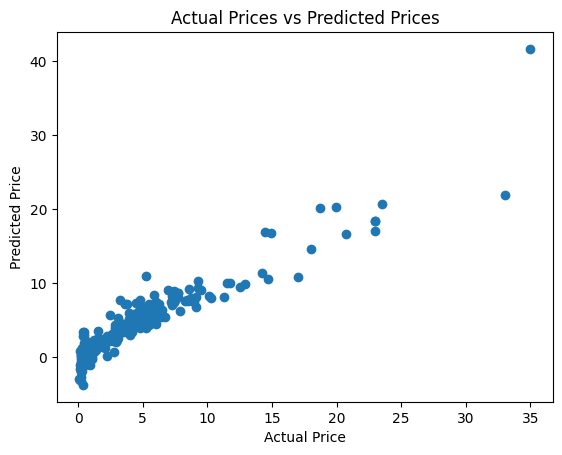

In [20]:
#Visualizing the acutal price and predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [22]:
#model evaluation on testing data
test_data_prediction=lin_reg_model.predict(X_test)

In [23]:
#R2 score error
test_error_score=metrics.r2_score(Y_test,test_data_prediction)
print(test_error_score)

0.8401532365377697


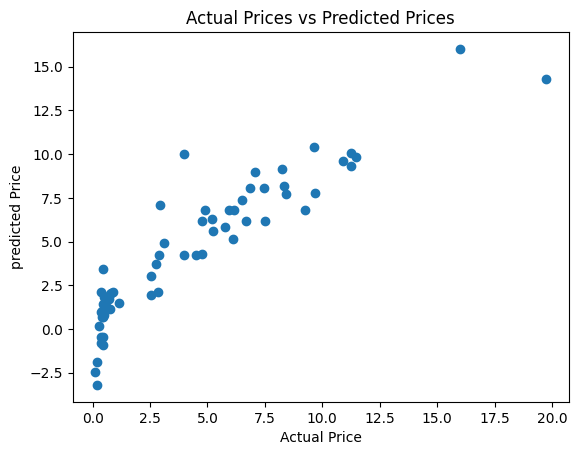

In [24]:
#visualizing

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso regression model

In [25]:
#LinearRegression

las_reg_model=Lasso()


In [26]:
las_reg_model.fit(X_train, Y_train)

Lasso()

In [27]:
#Model Evalution on training data

training_data_prediction=las_reg_model.predict(X_train)

In [28]:
#R squared error

error_score=metrics.r2_score(Y_train,training_data_prediction)
print(error_score)

0.843587395258283


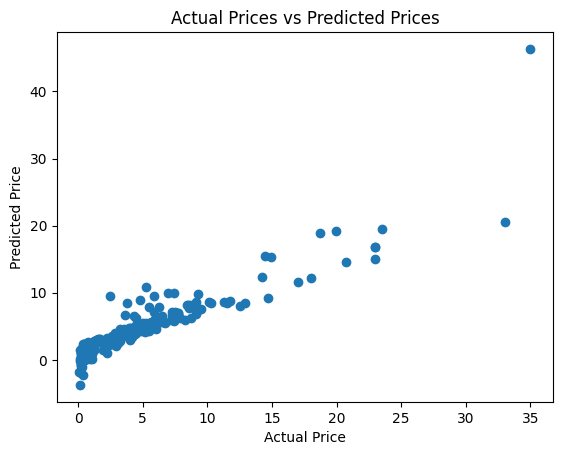

In [29]:
#Visualizing the acutal price and predicted price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [30]:
#model evaluation on testing data
test_data_prediction=las_reg_model.predict(X_test)

In [31]:
#R2 score error
test_error_score=metrics.r2_score(Y_test,test_data_prediction)
print(test_error_score)

0.8497457570738539


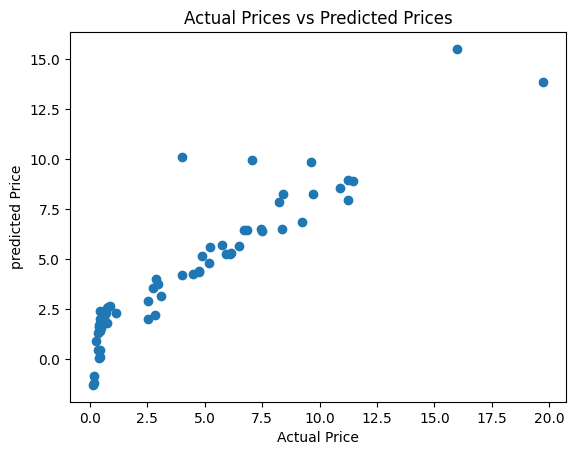

In [32]:
#visualizing

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()